In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from BackTest_Toolkit import FactorPurify, IndustryNeutralize, simple_factor_test, plot_factor_performance


In [3]:
df_TO = pd.read_excel('中证500.xlsx', sheet_name="turnover", header=1)
df_TO.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
df_TO['Date'] = pd.to_datetime(df_TO['Date'], format='%Y-%m-%d')
df_TO.set_index('Date', inplace=True)
df_TO.apply(pd.to_numeric, errors='coerce')
print(df_TO.head())

df_free_cap = pd.read_excel('中证500市值.xlsx', sheet_name="free_cap", header=1)
df_free_cap.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
df_free_cap['Date'] = pd.to_datetime(df_free_cap['Date'], format='%Y-%m-%d')
df_free_cap.set_index('Date', inplace=True)
df_free_cap.apply(pd.to_numeric, errors='coerce')
print(df_free_cap.tail())



            000009.SZ  000021.SZ  000027.SZ  ...  688778.SH  688819.SH  689009.SH
Date                                         ...                                 
2014-01-02     0.9996     0.4584     0.6332  ...        0.0        0.0        0.0
2014-01-03     1.0972     0.3971     1.3945  ...        0.0        0.0        0.0
2014-01-06     0.8792     0.8328     0.8782  ...        0.0        0.0        0.0
2014-01-07     0.4718     1.5621     0.7295  ...        0.0        0.0        0.0
2014-01-08     0.9042     1.3869     0.8293  ...        0.0        0.0        0.0

[5 rows x 500 columns]
               000009.SZ     000021.SZ  ...  688819.SH  689009.SH
Date                                    ...                      
2025-06-24  1.590601e+10  1.916089e+10  ...          0          0
2025-06-25  1.603239e+10  1.977264e+10  ...          0          0
2025-06-26  1.610461e+10  1.994743e+10  ...          0          0
2025-06-27  1.588796e+10  2.020961e+10  ...          0          0
2025-0

In [4]:
df_inst = pd.read_excel('中证500资金流动.xlsx', sheet_name="extra_large", header=1)
df_inst.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
df_inst['Date'] = pd.to_datetime(df_inst['Date'], format='%Y-%m-%d')
df_inst.set_index('Date', inplace=True)
df_inst.apply(pd.to_numeric, errors='coerce')
print(df_inst.tail())

df_retail = pd.read_excel('中证500资金流动.xlsx', sheet_name="small", header=1)
df_retail.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
df_retail['Date'] = pd.to_datetime(df_retail['Date'], format='%Y-%m-%d')
df_retail.set_index('Date', inplace=True)
df_retail.apply(pd.to_numeric, errors='coerce')
print(df_retail.tail())



            000009.SZ  000021.SZ  000027.SZ  ...  688778.SH  688819.SH  689009.SH
Date                                         ...                                 
2025-07-07   19424820  -41342979     986610  ...    7736580    2007704  -17401174
2025-07-08   16381960  150250584   11208918  ...    2039638   -1163989   10809285
2025-07-09   -9886315  -54923828  -12035330  ...    2250407    -708008  -22715561
2025-07-10    9701932  -24872198   -5546287  ...  -12195700     612713   14296827
2025-07-11   18143673  -17091409   -1016406  ...   -2528864   -5459695  -15648051

[5 rows x 500 columns]
            000009.SZ  000021.SZ  000027.SZ  ...  688778.SH  688819.SH  689009.SH
Date                                         ...                                 
2025-07-07  -17950552   30069228  -20830940  ...  -28698877   -5398605  -10320189
2025-07-08    3929042 -215955216   15182207  ...  -15965447    2816567   12058125
2025-07-09   21734775   69578517   42629303  ...       4295    2232623   2

In [5]:
df_close = pd.read_excel('中证500.xlsx', sheet_name="close", header=1)
df_close.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)   
df_close['Date'] = pd.to_datetime(df_close['Date'], format='%Y-%m-%d')
df_close.set_index('Date', inplace=True)
df_close.apply(pd.to_numeric, errors='coerce')


df_industry = pd.read_excel('行业代码500.xlsx', sheet_name="申万", header=0)


df_total_cap = pd.read_excel('中证500市值.xlsx', sheet_name="total_cap", header=1)
df_total_cap.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
df_total_cap['Date'] = pd.to_datetime(df_total_cap['Date'], format='%Y-%m-%d')
df_total_cap.set_index('Date', inplace=True)
df_total_cap.apply(pd.to_numeric, errors='coerce')
df_total_cap = df_total_cap.map(lambda x: np.log(x) if x > 0 else np.nan)
df_total_cap_monthly = df_total_cap.resample('ME').last()


In [6]:
ret_close = df_close.pct_change().resample('ME').mean()  # 每月收益率

In [7]:
## 因子6：每月日度换手均值
monthly_avg_turnover = df_TO.resample('ME').mean()
#极值处理：用MAD法替换异常值
M_turnove_avg = monthly_avg_turnover.apply(
    lambda x: x.clip(
        lower=x.median() - 3 * (1.4826 * (x - x.median()).abs().median()),
        upper=x.median() + 3 * (1.4826 * (x - x.median()).abs().median())
    )
)
# 市值中性化处理
M_turnove_avg = FactorPurify(M_turnove_avg, [df_total_cap_monthly])
# 行业中性化处理
M_turnove_avg = IndustryNeutralize(M_turnove_avg, df_industry)

print(M_turnove_avg.tail())

d:\Sherlock\Internship\SMS intern\Factor_BackTest\BackTest_Toolkit.py:151: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  factor_res = pd.concat([factor_res, res.resid.rename(idx)], axis=1)


           000009.SZ 000021.SZ 000027.SZ  ... 301536.SZ 603341.SH 001389.SZ
2025-02-28  -0.31489  3.297734 -1.481122  ... -1.823901 -1.531203 -1.582808
2025-03-31 -0.602869  1.495334 -1.132345  ... -1.403369 -1.333404 -1.353114
2025-04-30  -0.57791  0.282809 -0.971125  ... -1.302396 -1.237699 -1.255329
2025-05-31 -0.448214 -0.048726 -0.692618  ...  -1.08623 -1.037884 -1.058209
2025-06-30  0.003483  0.374777 -0.820728  ... -1.152249 -1.053764 -1.146969

[5 rows x 500 columns]


In [8]:
## 因子7：机构交易热度
inst_heat = df_inst.abs().div(df_free_cap)
inst_heat = inst_heat.replace([np.inf, -np.inf], 0)

# 转为月频数据
monthly_inst_heat = inst_heat.resample('ME').mean()
# 极值处理：用MAD法替换异常值
monthly_inst_heat = monthly_inst_heat.apply(
    lambda x: x.clip(
        lower=x.median() - 3 * (1.4826 * (x - x.median()).abs().median()),
        upper=x.median() + 3 * (1.4826 * (x - x.median()).abs().median())
    )
)
# 市值中性化处理
monthly_inst_heat = FactorPurify(monthly_inst_heat, [df_total_cap_monthly])
# 行业中性化处理
monthly_inst_heat = IndustryNeutralize(monthly_inst_heat, df_industry)

print(monthly_inst_heat.head())



d:\Sherlock\Internship\SMS intern\Factor_BackTest\BackTest_Toolkit.py:151: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  factor_res = pd.concat([factor_res, res.resid.rename(idx)], axis=1)


           000009.SZ 000021.SZ 000027.SZ  ... 301536.SZ 603341.SH 001389.SZ
2014-01-31  0.000345  0.000981  0.000705  ...       NaN       NaN       NaN
2014-02-28  0.002128  0.000515  0.000524  ...       NaN       NaN       NaN
2014-03-31  0.001841  0.000465  0.000985  ...       NaN       NaN       NaN
2014-04-30  0.001665  0.000751  0.000772  ...       NaN       NaN       NaN
2014-05-31  0.000273  0.000267  0.000618  ...       NaN       NaN       NaN

[5 rows x 500 columns]


In [9]:
## 因子8：个人投资者交易热度
retail_heat = df_retail.abs().div(df_free_cap)
retail_heat = retail_heat.replace([np.inf, -np.inf], 0)

monthly_retail_heat = retail_heat.resample('ME').mean()
# 极值处理：用MAD法替换异常值
monthly_retail_heat = monthly_retail_heat.apply(
    lambda x: x.clip(
        lower=x.median() - 3 * (1.4826 * (x - x.median()).abs().median()),
        upper=x.median() + 3 * (1.4826 * (x - x.median()).abs().median())
    )
)
# 市值中性化处理
monthly_retail_heat = FactorPurify(monthly_retail_heat, [df_total_cap_monthly])
# 行业中性化处理
monthly_retail_heat = IndustryNeutralize(monthly_retail_heat, df_industry)

print(monthly_retail_heat.head())

d:\Sherlock\Internship\SMS intern\Factor_BackTest\BackTest_Toolkit.py:151: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  factor_res = pd.concat([factor_res, res.resid.rename(idx)], axis=1)


           000009.SZ 000021.SZ 000027.SZ  ... 301536.SZ 603341.SH 001389.SZ
2014-01-31  0.000317  0.002379  0.000677  ...       NaN       NaN       NaN
2014-02-28  0.001054  0.001394  0.000537  ...       NaN       NaN       NaN
2014-03-31  0.000921  0.001088  0.000902  ...       NaN       NaN       NaN
2014-04-30  0.000997  0.001212  0.000669  ...       NaN       NaN       NaN
2014-05-31  0.000135  0.001214  0.000647  ...       NaN       NaN       NaN

[5 rows x 500 columns]


In [12]:
TURNAVG = M_turnove_avg.copy()
TURNAVG.name = 'TURNAVG'
TURN_INST = monthly_inst_heat.copy()
TURN_INST.name = 'TURN_INST'
TURN_RETAIL = monthly_retail_heat.copy()
TURN_RETAIL.name = 'TURN_RETAIL'

TURNAVG表现数据


d:\Sherlock\Internship\SMS intern\Factor_BackTest\BackTest_Toolkit.py:31: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  factor1 = factor1.fillna(np.nan)


------------------------------------------------------------
因子统计数据
IC Mean: -2.75%,
 IC Std: 16.33%
Rank IC Mean: -4.15%,
 Rank IC Std: 15.24%
IC t-stat: -1.97
IC > 0 Win Rate: 39.86%
IR: -0.17
------------------------------------------------------------
group_id         0.0       1.0       2.0       3.0       4.0
date                                                        
2014-01-31  0.001797  0.001215  0.002922  0.002905  0.002383
2014-02-28  0.001697 -0.000318 -0.001309 -0.002428 -0.004361
2014-03-31 -0.000764 -0.000073 -0.000590 -0.001645 -0.001448
2014-04-30  0.001695  0.000905  0.001289  0.000700  0.001640
2014-05-31  0.001112  0.000854  0.001813  0.002731  0.003399
...              ...       ...       ...       ...       ...
2025-01-31  0.004285  0.000033  0.000887  0.001940  0.006299
2025-02-28 -0.000019  0.000864  0.001243  0.000484 -0.001049
2025-03-31 -0.000916 -0.000549 -0.001861 -0.001829 -0.002337
2025-04-30  0.000140  0.000963  0.001884  0.001587 -0.000690
2025-05-31  

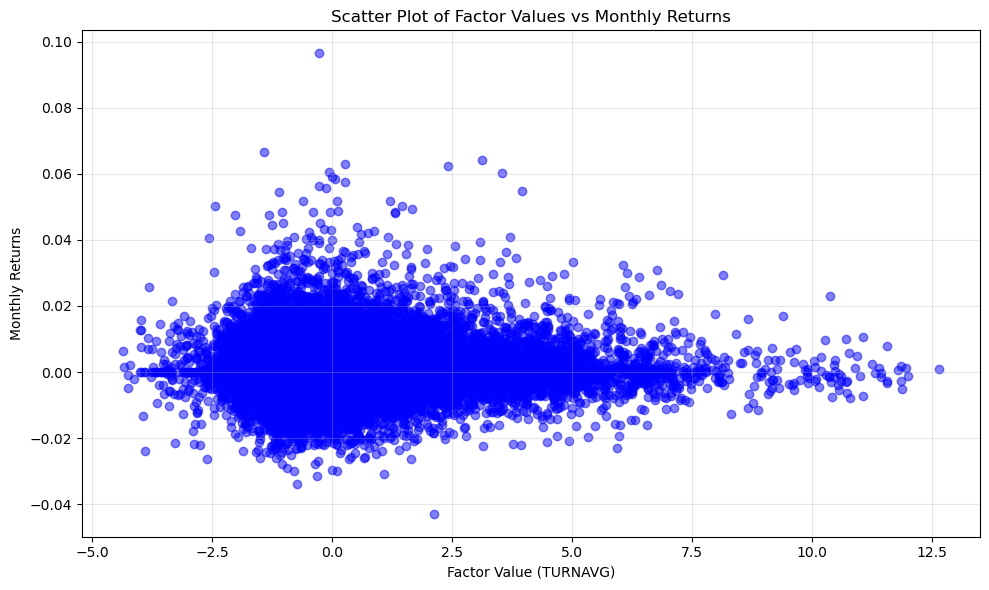

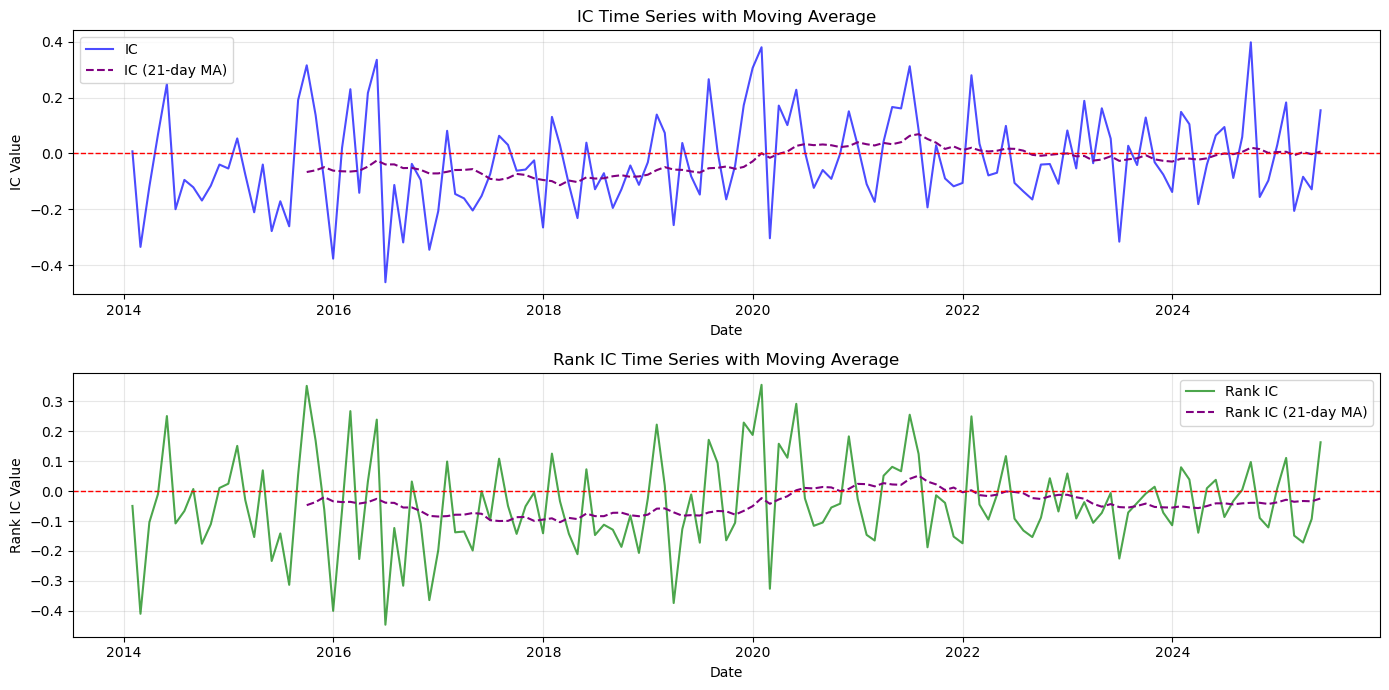

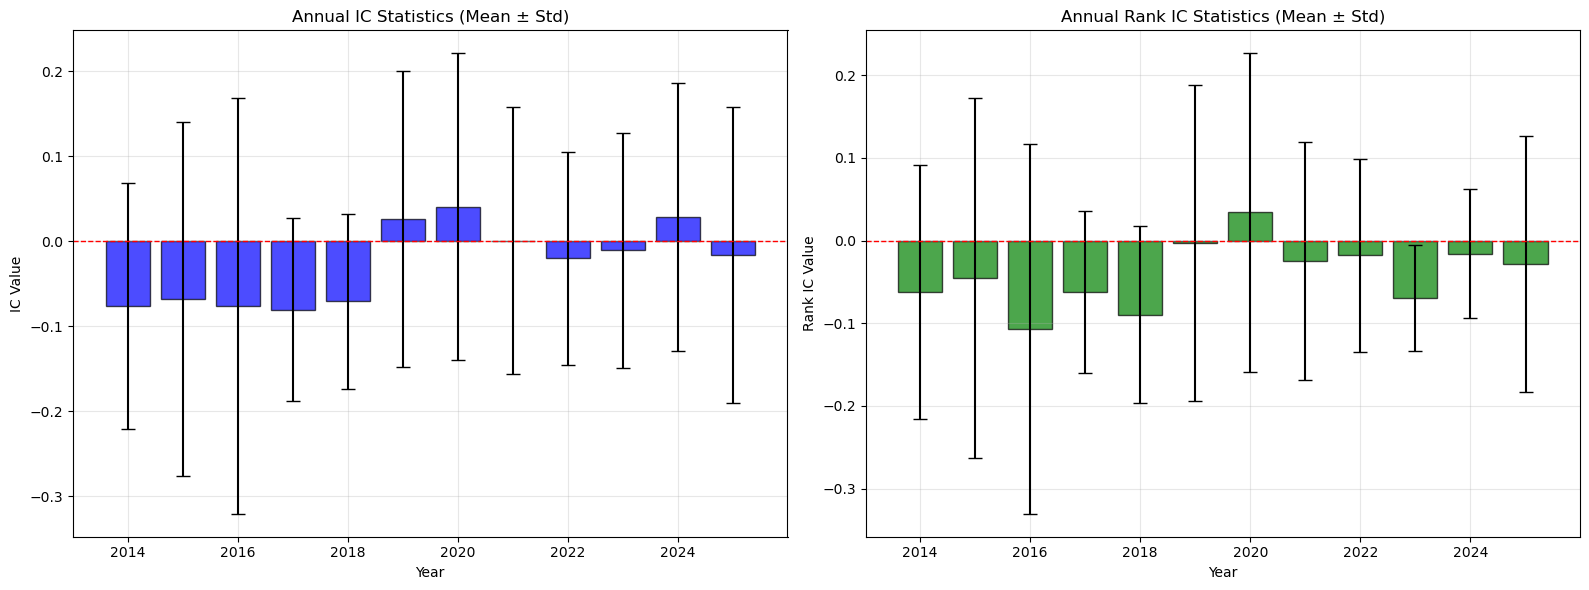

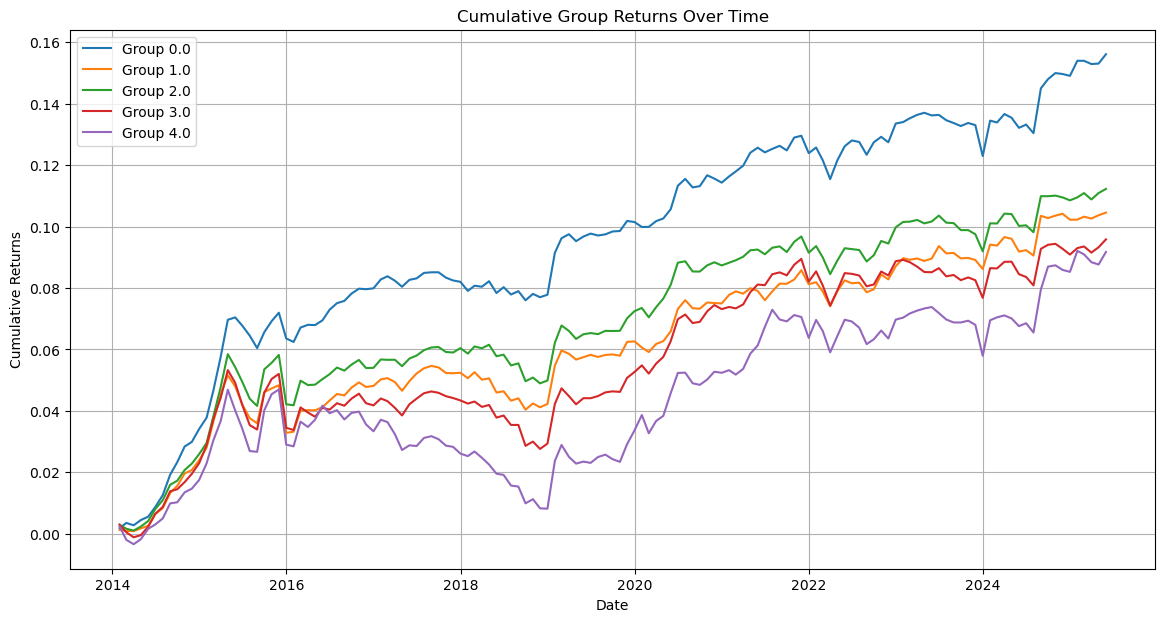

Long position: Group 0.0
Short position: Group 4.0


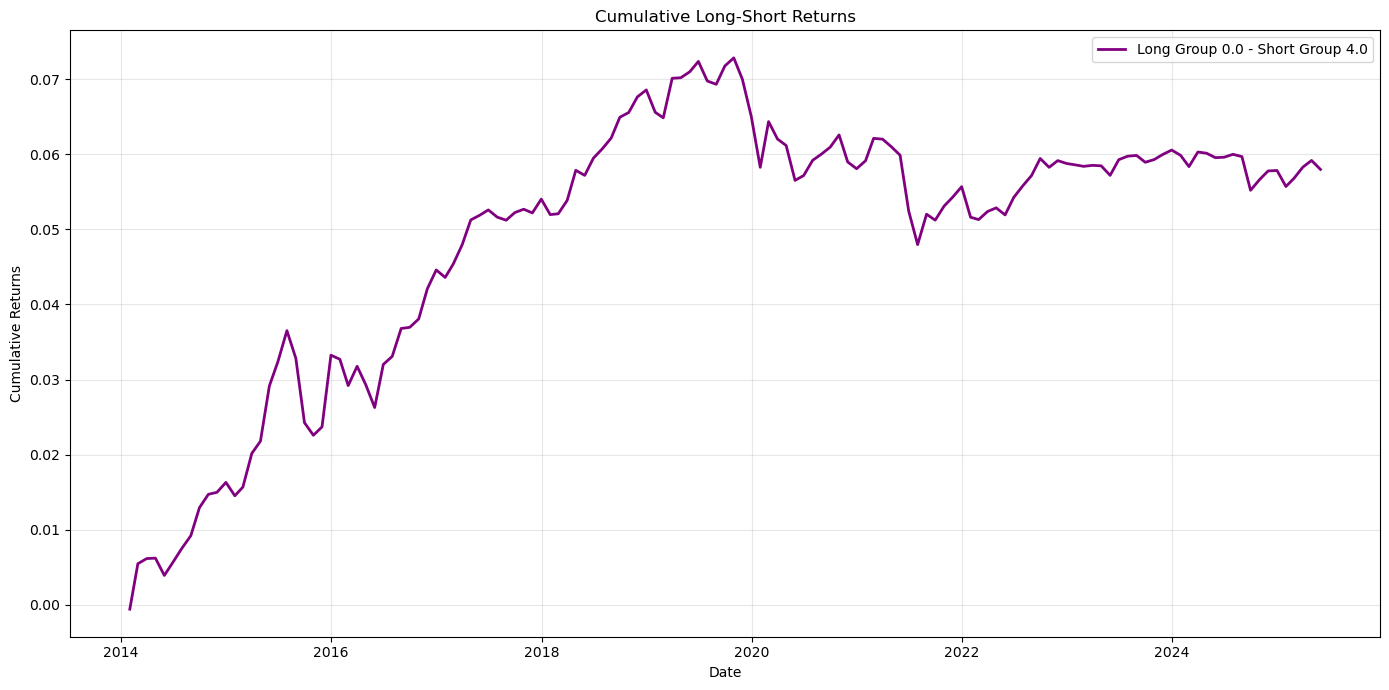

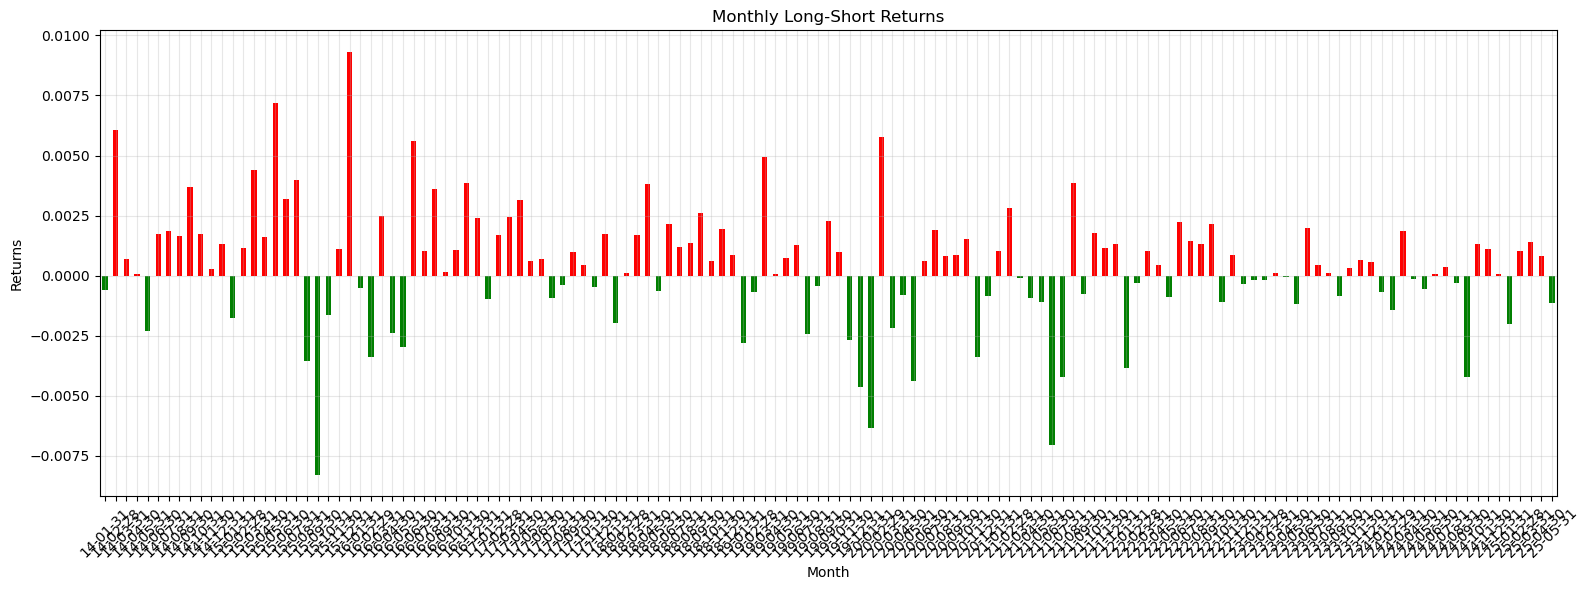

Annual Return: 10.45%
Annual Volatility: 3.99%
Sharpe Ratio: 2.62
Max Drawdown: 2.49%


In [13]:
#TURNAVG因子表现
print('TURNAVG表现数据')
ic6, rankic6, group_ret6 = simple_factor_test(TURNAVG, ret_close)

plot_factor_performance(TURNAVG, ret_close, ic6, rankic6, group_ret6)

TURN_INST表现数据


d:\Sherlock\Internship\SMS intern\Factor_BackTest\BackTest_Toolkit.py:31: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  factor1 = factor1.fillna(np.nan)


------------------------------------------------------------
因子统计数据
IC Mean: -1.21%,
 IC Std: 8.30%
Rank IC Mean: 0.64%,
 Rank IC Std: 13.78%
IC t-stat: -1.71
IC > 0 Win Rate: 41.30%
IR: -0.15
------------------------------------------------------------
group_id         0.0       1.0       2.0       3.0       4.0
date                                                        
2014-01-31 -0.001072  0.001665  0.002312  0.006204  0.002151
2014-02-28 -0.003291 -0.001385 -0.001626 -0.000447 -0.000269
2014-03-31 -0.001350 -0.000424 -0.001570 -0.000466 -0.000593
2014-04-30  0.000930  0.000986  0.001600  0.001499  0.001327
2014-05-31  0.001534  0.001419  0.001624  0.003663  0.001794
...              ...       ...       ...       ...       ...
2025-01-31  0.004415  0.001456  0.004102  0.001440  0.002032
2025-02-28 -0.000296 -0.000594  0.000504  0.001102  0.000808
2025-03-31 -0.001320 -0.001608 -0.002006 -0.001488 -0.001069
2025-04-30 -0.000791  0.001013  0.001302  0.001365  0.000995
2025-05-31  0.

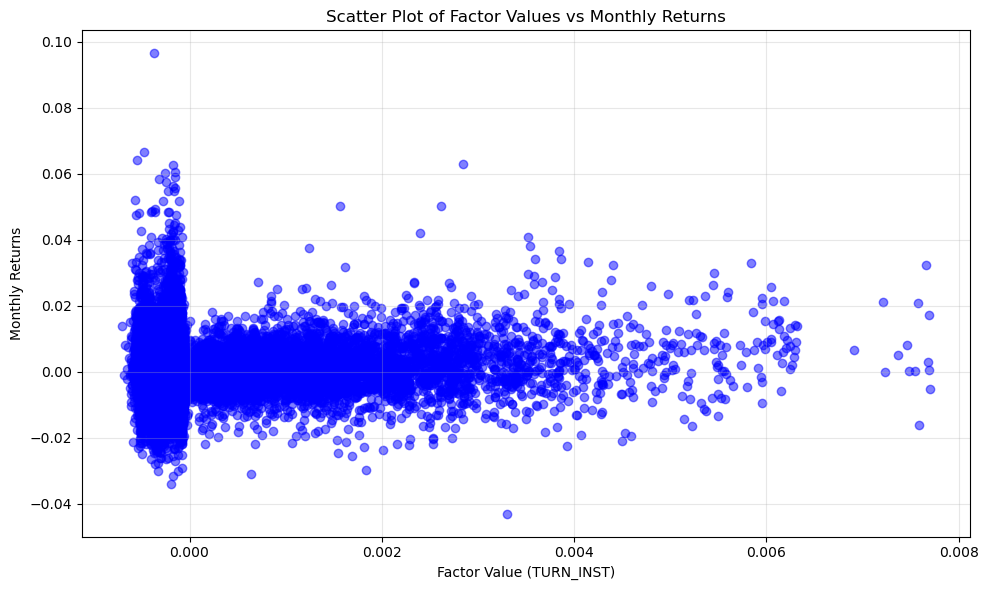

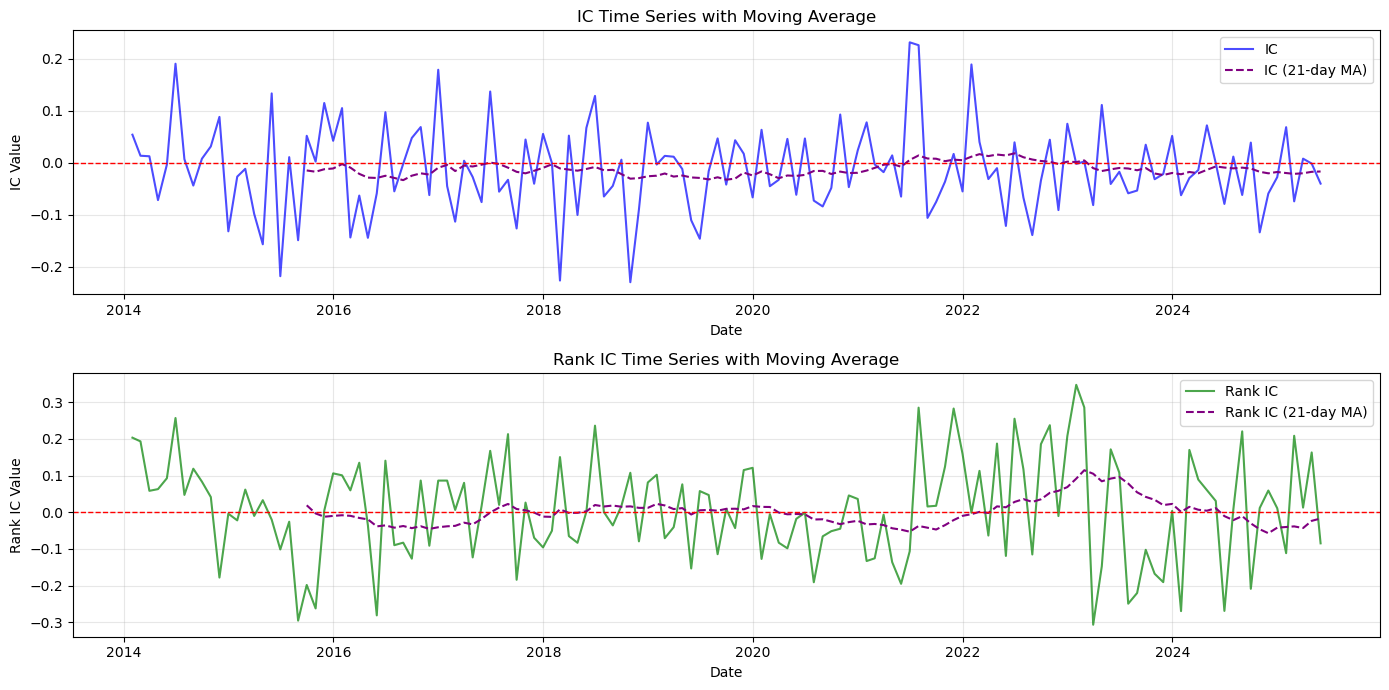

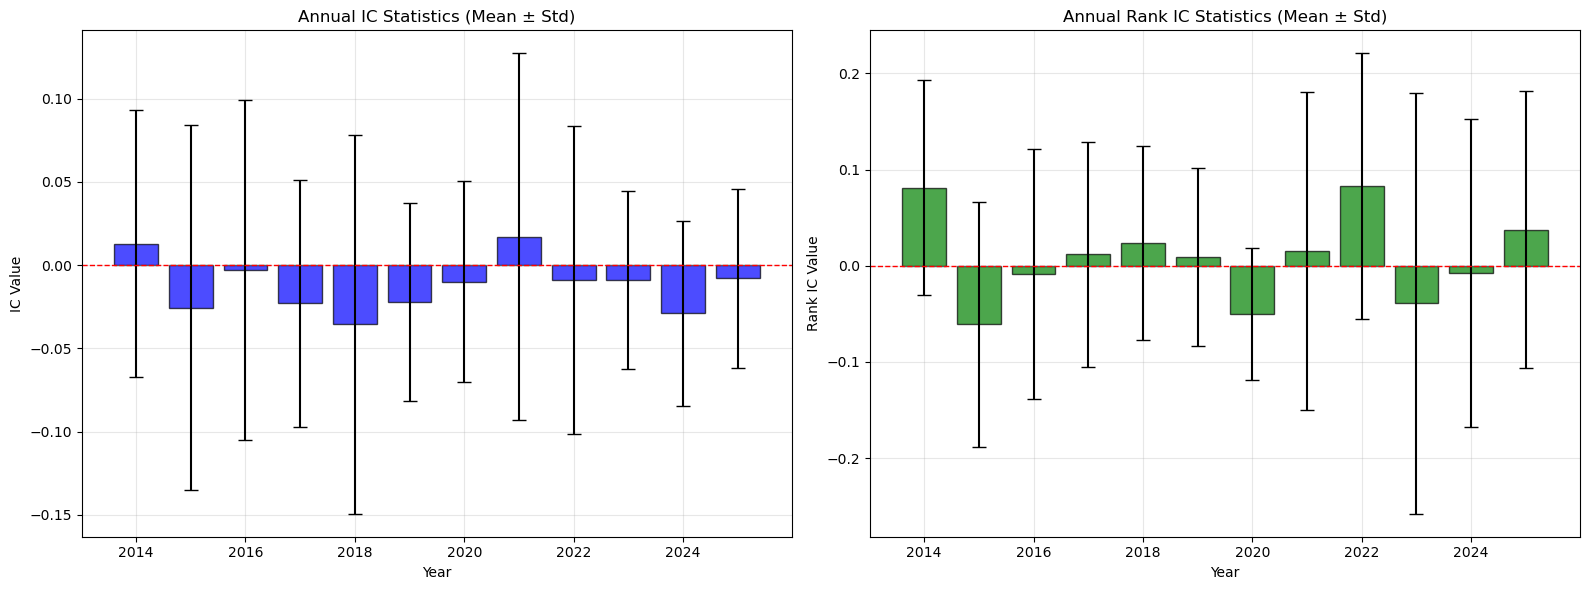

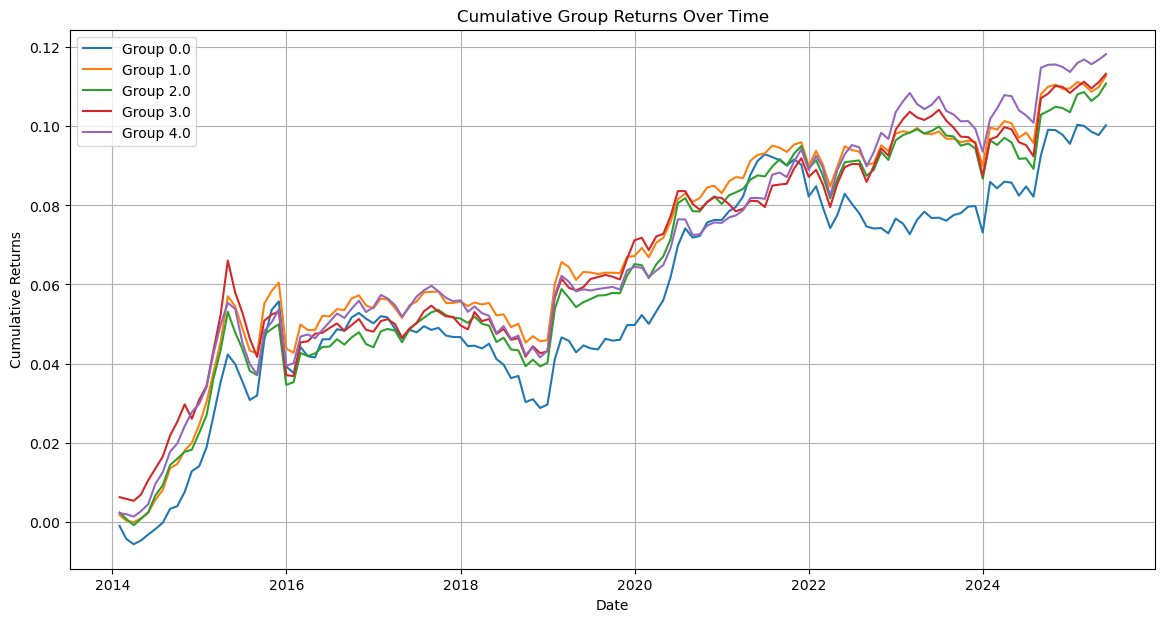

Long position: Group 4.0
Short position: Group 0.0


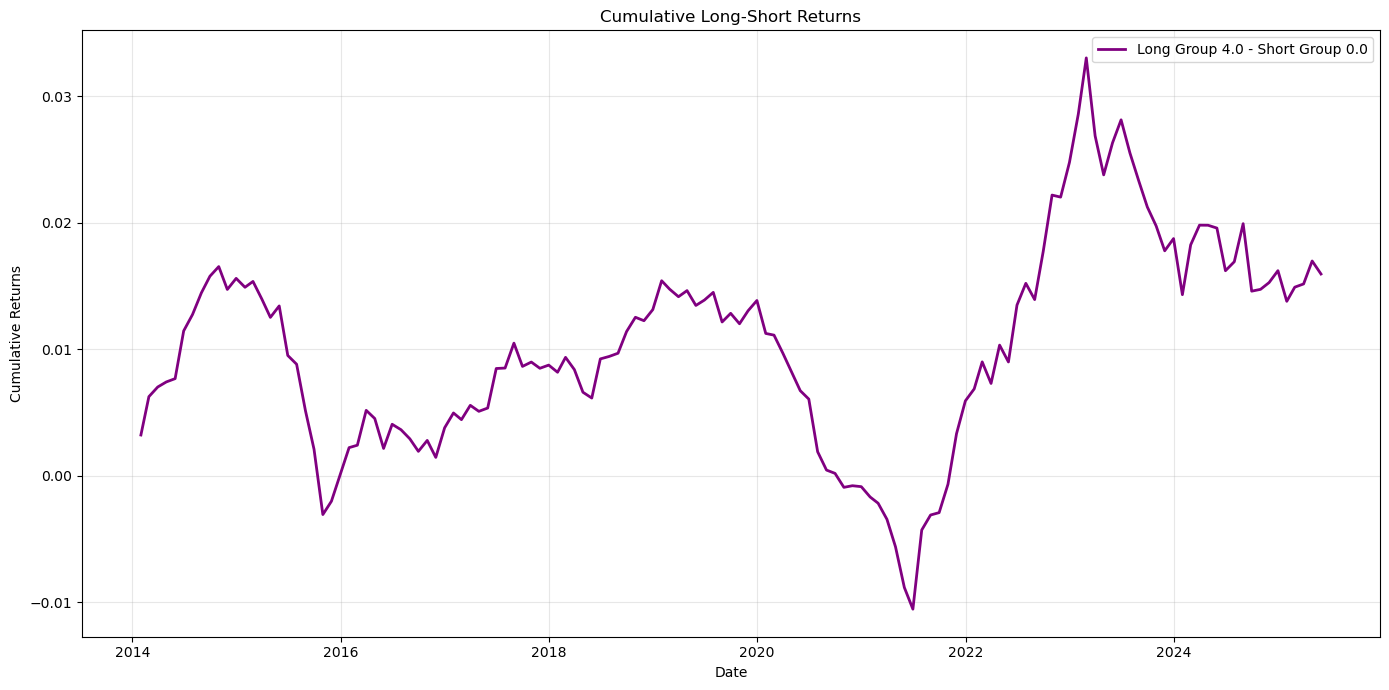

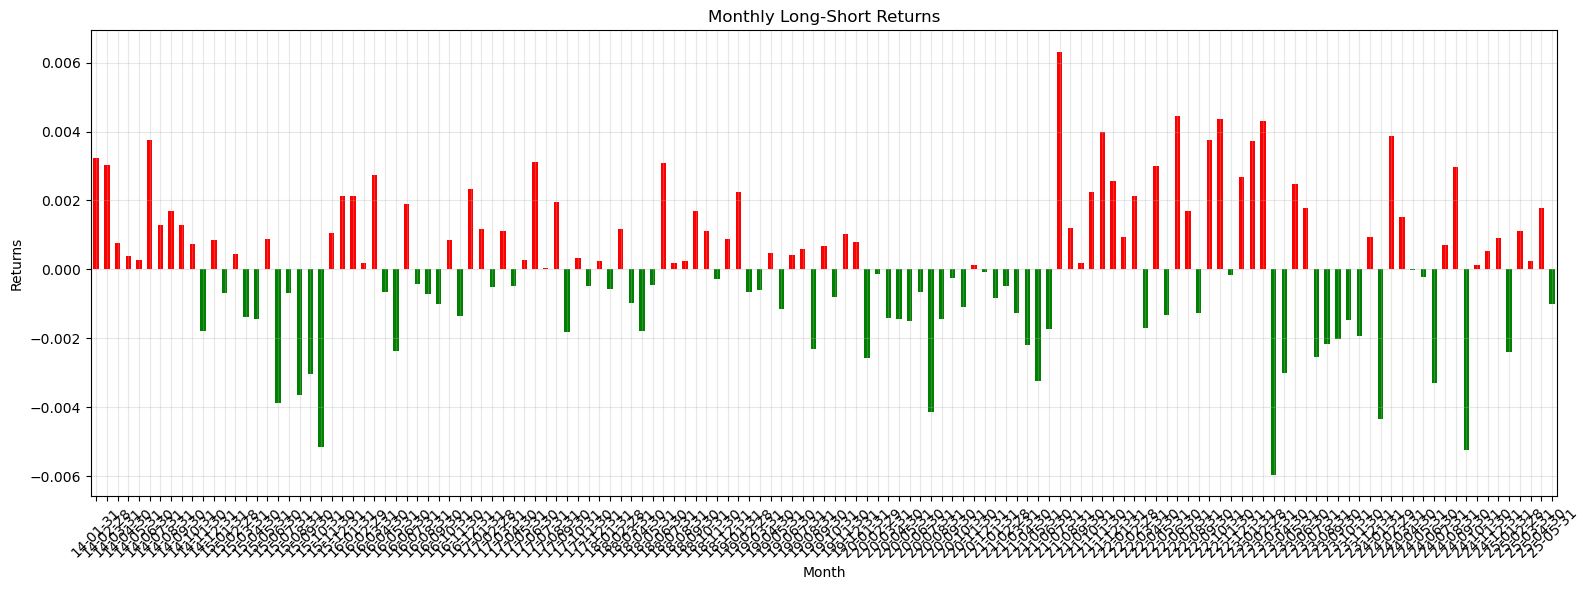

Annual Return: 2.97%
Annual Volatility: 3.39%
Sharpe Ratio: 0.88
Max Drawdown: 2.71%


In [14]:
#TURN_INST因子表现
print('TURN_INST表现数据')
ic7, rankic7, group_ret7 = simple_factor_test(TURN_INST, ret_close)

plot_factor_performance(TURN_INST, ret_close, ic7, rankic7, group_ret7)

TURN_RETAIL因子表现数据


d:\Sherlock\Internship\SMS intern\Factor_BackTest\BackTest_Toolkit.py:31: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  factor1 = factor1.fillna(np.nan)


------------------------------------------------------------
因子统计数据
IC Mean: -1.45%,
 IC Std: 8.24%
Rank IC Mean: -4.48%,
 Rank IC Std: 13.75%
IC t-stat: -2.06
IC > 0 Win Rate: 42.75%
IR: -0.18
------------------------------------------------------------
group_id         0.0       1.0       2.0       3.0       4.0
date                                                        
2014-01-31  0.006249  0.002377  0.001689 -0.001116  0.002051
2014-02-28 -0.000447 -0.001626 -0.001385 -0.003291 -0.000269
2014-03-31 -0.001350 -0.000424 -0.001570 -0.000466 -0.000593
2014-04-30  0.001585  0.001554  0.001104  0.000885  0.001308
2014-05-31  0.003819  0.001571  0.001359  0.001569  0.001670
...              ...       ...       ...       ...       ...
2025-01-31  0.004415  0.001456  0.004102  0.001440  0.002032
2025-02-28 -0.000296 -0.000594  0.000504  0.001102  0.000808
2025-03-31 -0.001094 -0.001849 -0.001766 -0.001505 -0.001278
2025-04-30 -0.000791  0.001013  0.001302  0.001365  0.000995
2025-05-31  0

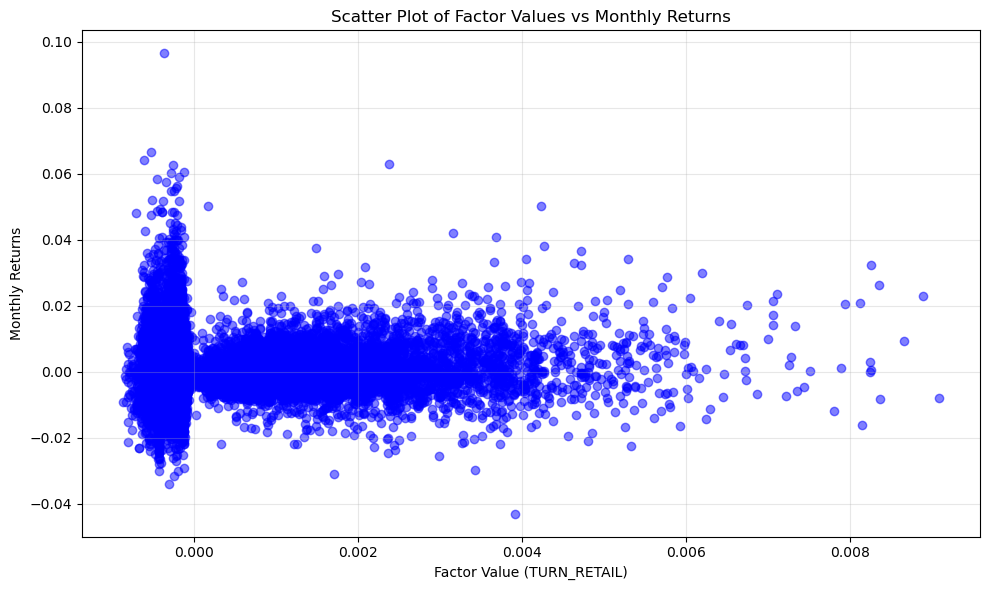

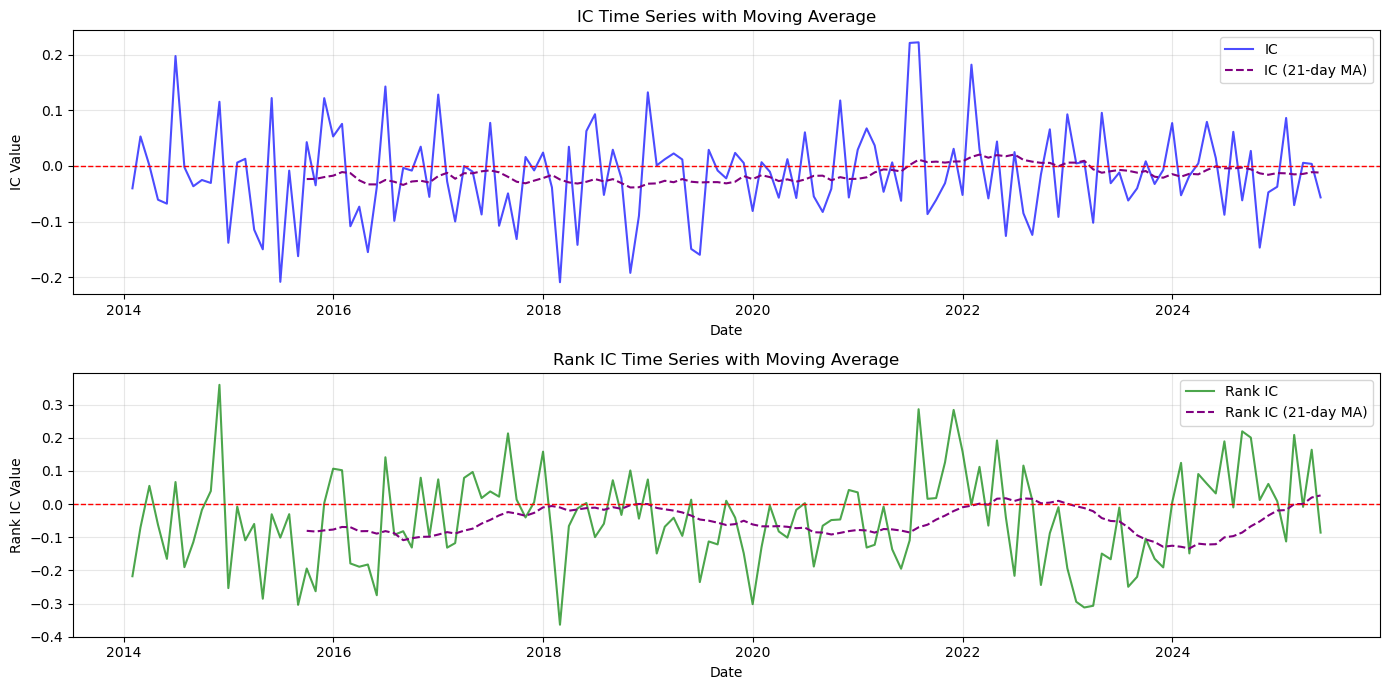

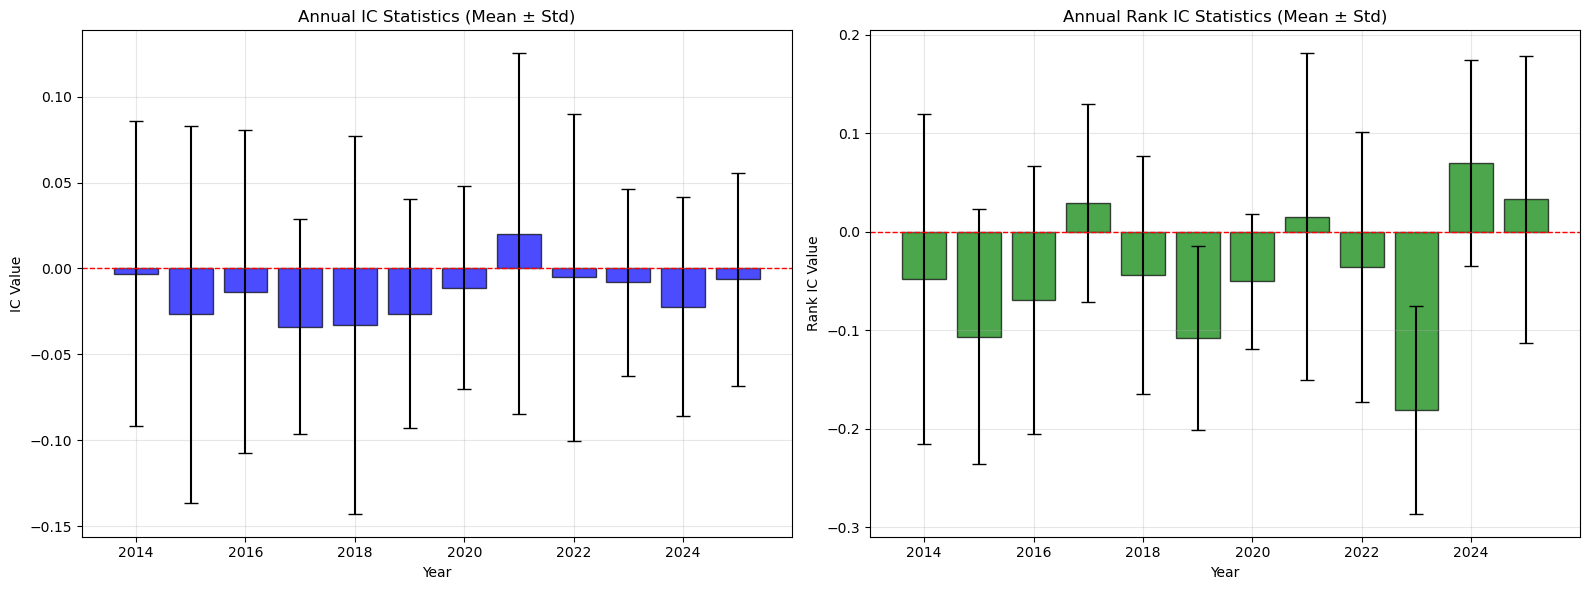

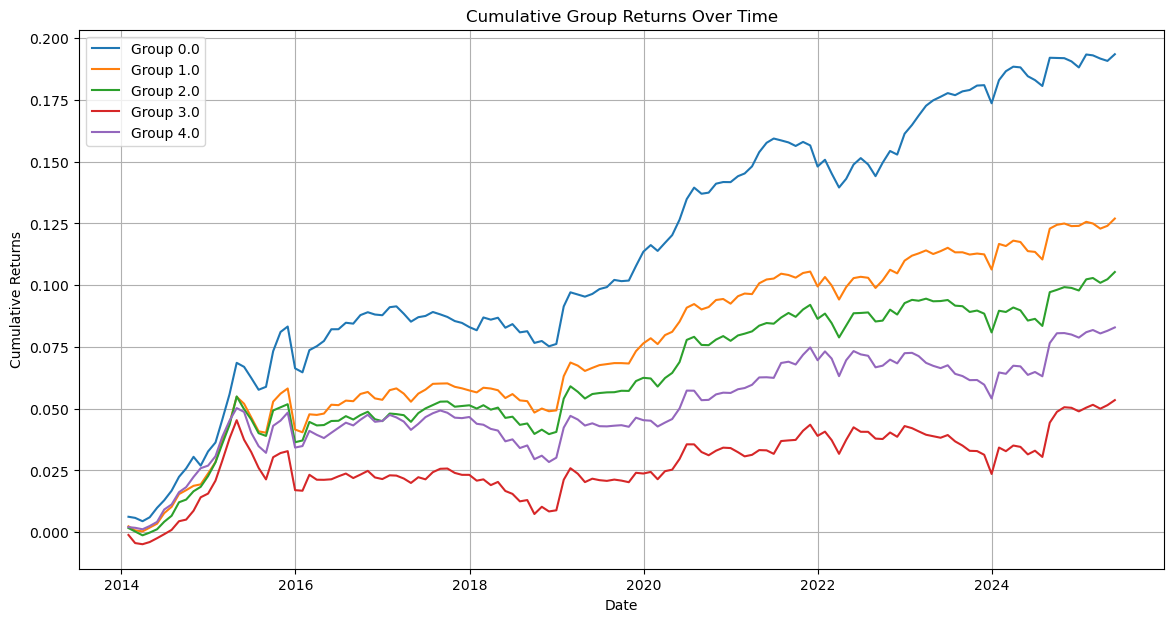

Long position: Group 0.0
Short position: Group 3.0


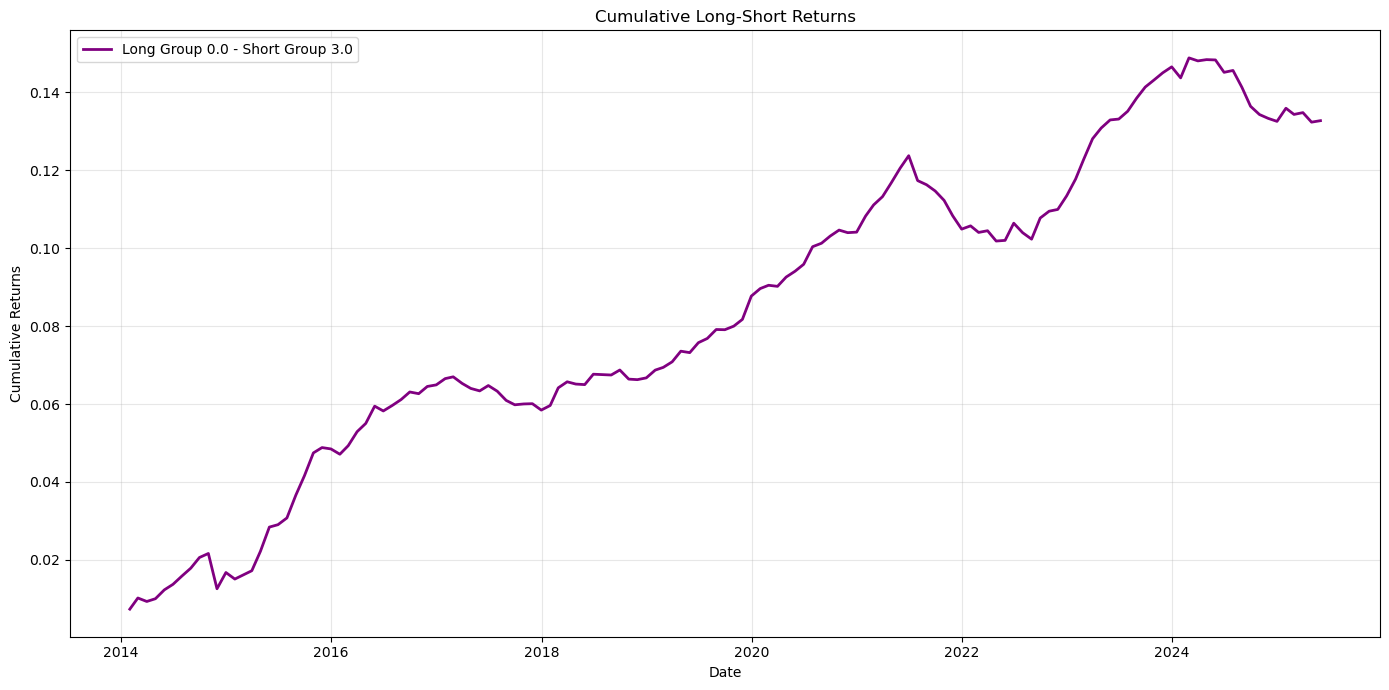

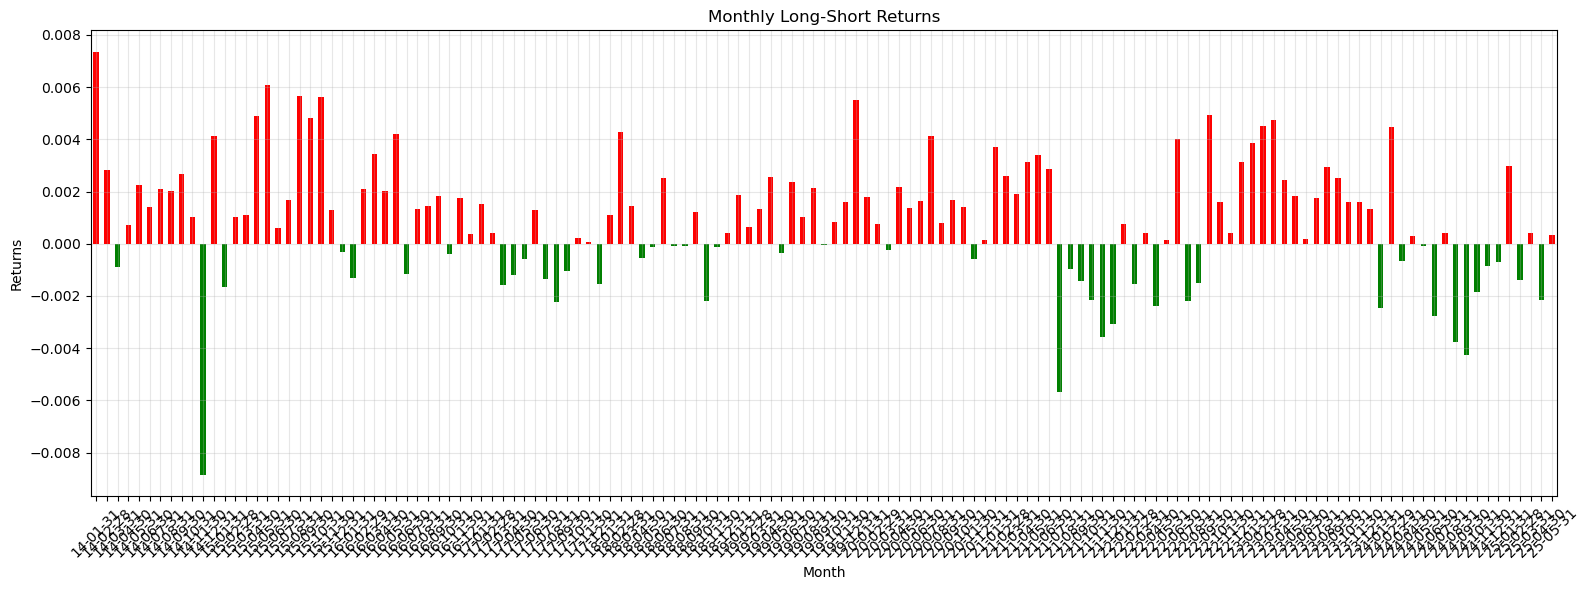

Annual Return: 23.00%
Annual Volatility: 3.82%
Sharpe Ratio: 6.02
Max Drawdown: 2.19%


In [15]:
# TURN_RETAIL因子表现数据
print("TURN_RETAIL因子表现数据")
ic8, rankic8, group_ret8 = simple_factor_test(TURN_RETAIL, ret_close)  

plot_factor_performance(TURN_RETAIL, ret_close, ic8, rankic8, group_ret8)